<a href="https://colab.research.google.com/github/alecbidaran/Simple-deep-learning-projects/blob/main/autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

TensorFlow 2.x selected.


In [ ]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd 
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
y_train_full.shape

(60000,)

In [ ]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [ ]:
stack_encoder=keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]),
                                      keras.layers.Dense(100,activation='selu'),
                                      keras.layers.Dense(30,activation='selu')])
stack_decoder=keras.models.Sequential([keras.layers.Dense(100,activation='selu',input_shape=[30]),
                                       keras.layers.Dense(28*28,activation='sigmoid'),
                                       keras.layers.Reshape([28,28])])
stack_ae=keras.models.Sequential([stack_encoder,stack_decoder])

In [ ]:
stack_ae.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 30)                81530     
_________________________________________________________________
sequential_4 (Sequential)    (None, 28, 28)            82284     
Total params: 163,814
Trainable params: 163,814
Non-trainable params: 0
_________________________________________________________________


In [ ]:
stack_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(lr=1.5), metrics=[rounded_accuracy])

In [ ]:
histoy=stack_ae.fit(X_train,X_train,batch_size=32,epochs=20,validation_data=[X_valid,X_valid],verbose=1)

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 7s 128us/sample - loss: 0.3359 - rounded_accuracy: 0.8891 - val_loss: 0.3104 - val_rounded_accuracy: 0.9118
Epoch 2/20
55000/55000 [==============================] - 5s 98us/sample - loss: 0.3039 - rounded_accuracy: 0.9167 - val_loss: 0.3049 - val_rounded_accuracy: 0.9115
Epoch 3/20
55000/55000 [==============================] - 5s 97us/sample - loss: 0.2968 - rounded_accuracy: 0.9230 - val_loss: 0.2954 - val_rounded_accuracy: 0.9267
Epoch 4/20
55000/55000 [==============================] - 5s 98us/sample - loss: 0.2927 - rounded_accuracy: 0.9267 - val_loss: 0.2939 - val_rounded_accuracy: 0.9240
Epoch 5/20
55000/55000 [==============================] - 5s 97us/sample - loss: 0.2901 - rounded_accuracy: 0.9291 - val_loss: 0.2899 - val_rounded_accuracy: 0.9305
Epoch 6/20
55000/55000 [==============================] - 5s 98us/sample - loss: 0.2882 - rounded_accuracy: 0.9308 - val_loss

In [ ]:
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index],cmap='binary')
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstructions[image_index],cmap='binary')

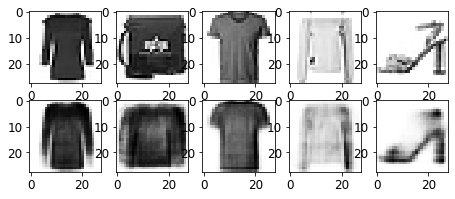

In [ ]:
show_reconstructions(stack_ae)

# convAutoencoder

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
latent_code=20
conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(latent_code)
])
conv_decoder = keras.models.Sequential([
    keras.layers.Input(shape=(latent_code,)),
    keras.layers.Dense(3*3*64),
    keras.layers.Reshape((3,3,64)),
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])


In [ ]:
conv_ae.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_9 (Sequential)    (None, 100)               80996     
_________________________________________________________________
sequential_10 (Sequential)   (None, 28, 28)            81409     
Total params: 162,405
Trainable params: 162,405
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(lr=0.01), metrics=[rounded_accuracy])

In [ ]:
histoy1=conv_ae.fit(X_train,X_train,verbose=1,validation_data=[X_valid,X_valid],epochs=20)

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 9s 156us/sample - loss: 0.6088 - rounded_accuracy: 0.6853 - val_loss: 0.5999 - val_rounded_accuracy: 0.6824
Epoch 2/20
55000/55000 [==============================] - 8s 140us/sample - loss: 0.5945 - rounded_accuracy: 0.6856 - val_loss: 0.5907 - val_rounded_accuracy: 0.6824
Epoch 3/20
55000/55000 [==============================] - 8s 142us/sample - loss: 0.5387 - rounded_accuracy: 0.7218 - val_loss: 0.4828 - val_rounded_accuracy: 0.7771
Epoch 4/20
55000/55000 [==============================] - 8s 141us/sample - loss: 0.4420 - rounded_accuracy: 0.8176 - val_loss: 0.4064 - val_rounded_accuracy: 0.8464
Epoch 5/20
55000/55000 [==============================] - 8s 138us/sample - loss: 0.3827 - rounded_accuracy: 0.8607 - val_loss: 0.3688 - val_rounded_accuracy: 0.8707
Epoch 6/20
55000/55000 [==============================] - 8s 138us/sample - loss: 0.3566 - rounded_accuracy: 0.8780 - val

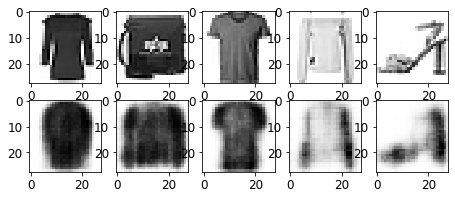

In [ ]:
show_reconstructions(conv_ae)